# UAS Teknik Visualisasi Data

## Import Module

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, mode

## Read Data From CSV File

In [57]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

## Read The First 5 Data

In [58]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Correlation Analysis of Unit Price and Quantity

In [59]:
korelasi = pearsonr(df['Unit price'], df['Quantity'])
print(korelasi.statistic)

0.010777564342497263


## Correlation Analysis of Unit Price and Tax 5%

In [60]:
korelasi = pearsonr(df['Unit price'], df['Tax 5%'])
print(korelasi.statistic)

0.6339620885890691


## Correlation Analysis of Unit Price and Total

In [61]:
korelasi = pearsonr(df['Unit price'], df['Total'])
print(korelasi.statistic)

0.6339620885890691


## Correlation Analysis of Quantity and Tax 5%

In [62]:
korelasi = pearsonr(df['Quantity'], df['Tax 5%'])
print(korelasi.statistic)

0.7055101859433064


## Correlation Analysis of Quantity and Total

In [63]:
korelasi = pearsonr(df['Quantity'], df['Total'])
print(korelasi.statistic)

0.7055101859433064


## Setelah dilakukan analisis korelasi antara variabel 'Unit price', 'Quantity', 'Tax 5%', dan 'Total' ditemukan bahwa:
- Variabel 'Unit price' dan 'Quantity' berkorelasi sangat lemah
- Variabel 'Unit price' dan 'Tax 5%' berkorelasi sedang (moderat)
- Variabel 'Unit price' dan 'Total' berkorelasi sedang (moderat)
- Variabel 'Quantity' dan 'Tax 5%' berkorelasi kuat
- Variabel 'Quantity' dan 'Total' berkorelasi kuat

## Untuk dimensi yang harus direduksi atau dihilangkan adalah dimensi 'gross margin percentage',
## karena dimensi tersebut memiliki data yang sama di semua records

## Remove The 'gross margin percentage' Dimension

In [64]:
df = df.drop(columns=['gross margin percentage'])

In [65]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


#  Unit Price (Mean, Median, Modus)

In [107]:
unit_price_mean = np.mean(df['Unit price'])
unit_price_median = np.median(df['Unit price'])
unit_price_modus = mode(df['Unit price'])

print(f'Unit Price Mean: {unit_price_mean}')
print(f'Unit Price Median: {unit_price_median}')
print(f'Unit Price Modus: {unit_price_modus.mode}')

Unit Price Mean: 55.67213
Unit Price Median: 55.230000000000004
Unit Price Modus: 83.77


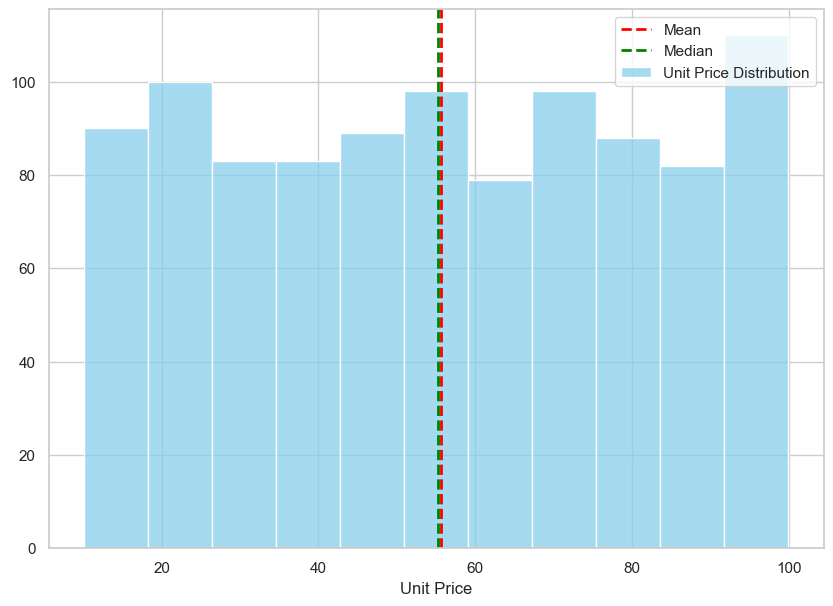

In [108]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['Unit price'], color='skyblue', label='Unit Price Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(unit_price_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(unit_price_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('Unit Price')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()